In [1]:
import pandas as pd

In [2]:
path = "../data/eleme.xlsx"
df = pd.read_excel(
    path,
    sheet_name=0
)

/Users/tylerxie/airepo/edaagent/.venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Exploratory Data Analysis - Eleme Food Delivery Data

## 1. Data Overview & Quality Assessment

In [3]:
# Basic Dataset Information
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nDate Range: {df['下单时间'].min()} to {df['下单时间'].max()}")
print(f"\nColumns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\n\nData Types and Non-Null Counts:")
df.info()

DATASET OVERVIEW
Shape: 707 rows × 10 columns

Date Range: 2022-11-03 12:40:19 to 2025-11-02 19:21:27

Columns:
  1. 下单时间
  2. 订单号
  3. 商户信息
  4. 商品及数量
  5. 商品描述
  6. 收货人
  7. 地址
  8. 订单金额(元)
  9. 订单状态
  10. 订单子类型


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   下单时间     707 non-null    object
 1   订单号      707 non-null    int64 
 2   商户信息     707 non-null    object
 3   商品及数量    707 non-null    object
 4   商品描述     2 non-null      object
 5   收货人      689 non-null    object
 6   地址       674 non-null    object
 7   订单金额(元)  707 non-null    object
 8   订单状态     707 non-null    object
 9   订单子类型    2 non-null      object
dtypes: int64(1), object(9)
memory usage: 55.4+ KB


In [4]:
df.columns

Index(['下单时间', '订单号', '商户信息', '商品及数量', '商品描述', '收货人', '地址', '订单金额(元)', '订单状态',
       '订单子类型'],
      dtype='object')

In [5]:
df.head()

,下单时间,订单号,商户信息,商品及数量,商品描述,收货人,地址,订单金额(元),订单状态,订单子类型
0,2025-11-02 19:21:27,8067986093855079925,上海本帮现炒浇头面,"1、商品:纯肉烤肠, 数量:1;\n2、商品:###不需要餐具, 数量:1;\n3、商品:葱...",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,20.78元,已完成,NaN
1,2025-10-31 19:12:33,8067986092873502180,遇见小面(辉煌国际店),"1、商品:销魂擂椒卤肉饭, 数量:1;\n2、商品:无需餐具包, 数量:1;\n3、商品:秘...",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,27.6元,已完成,NaN
2,2025-10-30 16:40:45,8067986092361811213,老广烧腊(盈创店),"1、商品:猪脚任性双拼饭, 数量:1;\n",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,24.8元,已完成,NaN
3,2025-10-30 16:37:57,8067986092370346321,南城香-饭香串香馄饨香(西二旗店),"1、商品:虾仁大馄饨+羊肉串x3, 数量:1;\n",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,21.3元,已完成,NaN
4,2025-10-29 16:05:15,8067986091942476182,南城香-饭香串香馄饨香(西二旗店),"1、商品:虾仁大馄饨+羊肉串x3, 数量:1;\n",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,21元,已完成,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   下单时间     707 non-null    object
 1   订单号      707 non-null    int64 
 2   商户信息     707 non-null    object
 3   商品及数量    707 non-null    object
 4   商品描述     2 non-null      object
 5   收货人      689 non-null    object
 6   地址       674 non-null    object
 7   订单金额(元)  707 non-null    object
 8   订单状态     707 non-null    object
 9   订单子类型    2 non-null      object
dtypes: int64(1), object(9)
memory usage: 55.4+ KB


In [16]:
df.describe(include='all')

,下单时间,订单号,商户信息,商品及数量,商品描述,收货人,地址,订单金额(元),订单状态,订单子类型
count,707,7.070000e+02,707,707,2,689,674,707,707,2
unique,706,NaN,236,398,2,8,46,375,3,1
top,2025-08-03 13:10:22,NaN,老广烧腊(盈创店),"1、商品:满足任意双拼饭, 数量:1;\n",日用品,谢(先生),西二旗智学苑4号楼2309,0元,已完成,饿了么跑腿-取送件
freq,2,NaN,116,66,1,537,366,46,677,2
mean,NaN,7.752971e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.054891e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.067980e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.067980e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.067980e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.067986e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Create a clean copy of the data
df_clean = df.copy()

# Parse order amount (remove '元' and convert to float)
df_clean['订单金额_数值'] = df_clean['订单金额(元)'].str.replace('元', '').astype(float)

# Convert order time to datetime
df_clean['下单时间'] = pd.to_datetime(df_clean['下单时间'])

# Extract time components
df_clean['下单日期'] = df_clean['下单时间'].dt.date
df_clean['下单小时'] = df_clean['下单时间'].dt.hour
df_clean['星期几'] = df_clean['下单时间'].dt.dayofweek  # 0=Monday, 6=Sunday
df_clean['星期名称'] = df_clean['下单时间'].dt.day_name()
df_clean['月份'] = df_clean['下单时间'].dt.month
df_clean['日'] = df_clean['下单时间'].dt.day

# Label time periods
def get_meal_period(hour):
    if 6 <= hour < 10:
        return '早餐'
    elif 10 <= hour < 14:
        return '午餐'
    elif 14 <= hour < 17:
        return '下午茶'
    elif 17 <= hour < 21:
        return '晚餐'
    else:
        return '夜宵'

df_clean['用餐时段'] = df_clean['下单小时'].apply(get_meal_period)

print("Data cleaning completed!")
print(f"\nNew columns added: {[col for col in df_clean.columns if col not in df.columns]}")
print(f"\nCleaned data shape: {df_clean.shape}")
df_clean.head(3)

Data cleaning completed!

New columns added: ['订单金额_数值', '下单日期', '下单小时', '星期几', '星期名称', '月份', '日', '用餐时段']

Cleaned data shape: (707, 18)


,下单时间,订单号,商户信息,商品及数量,商品描述,收货人,地址,订单金额(元),订单状态,订单子类型,订单金额_数值,下单日期,下单小时,星期几,星期名称,月份,日,用餐时段
0,2025-11-02 19:21:27,8067986093855079925,上海本帮现炒浇头面,"1、商品:纯肉烤肠, 数量:1;\n2、商品:###不需要餐具, 数量:1;\n3、商品:葱...",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,20.78元,已完成,NaN,20.78,2025-11-02,19,6,Sunday,11,2,晚餐
1,2025-10-31 19:12:33,8067986092873502180,遇见小面(辉煌国际店),"1、商品:销魂擂椒卤肉饭, 数量:1;\n2、商品:无需餐具包, 数量:1;\n3、商品:秘...",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,27.6元,已完成,NaN,27.60,2025-10-31,19,4,Friday,10,31,晚餐
2,2025-10-30 16:40:45,8067986092361811213,老广烧腊(盈创店),"1、商品:猪脚任性双拼饭, 数量:1;\n",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,24.8元,已完成,NaN,24.80,2025-10-30,16,3,Thursday,10,30,下午茶


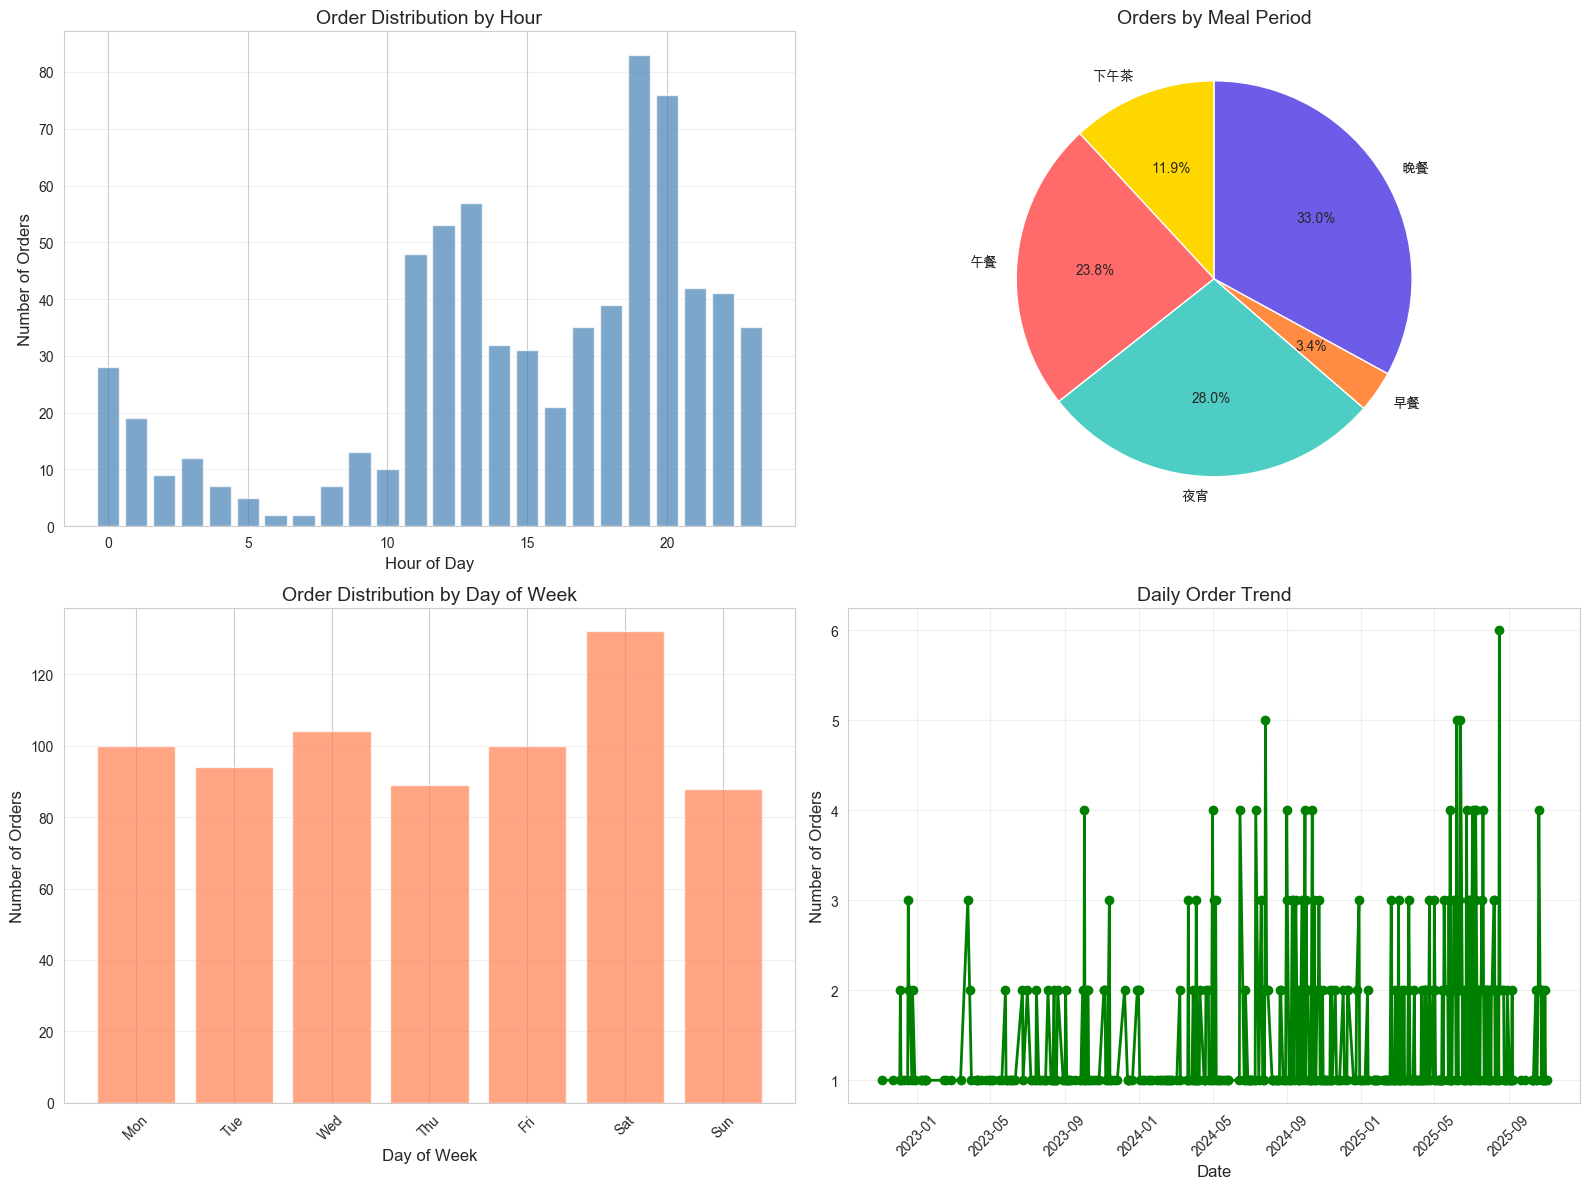


Temporal Statistics:
Most popular hour: 19:00 (83 orders)
Least popular hour: 6:00 (2 orders)

Most popular day: Saturday (132 orders)
Least popular day: Sunday (88 orders)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']  # Support Chinese characters

# Create subplots for temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Orders by hour of day
hourly_orders = df_clean.groupby('下单小时').size()
axes[0, 0].bar(hourly_orders.index, hourly_orders.values, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Number of Orders', fontsize=12)
axes[0, 0].set_title('Order Distribution by Hour', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Orders by meal period
meal_period_counts = df_clean['用餐时段'].value_counts().sort_index()
colors = ['#FFD700', '#FF6B6B', '#4ECDC4', '#FF8C42', '#6C5CE7']
axes[0, 1].pie(meal_period_counts.values, labels=meal_period_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('Orders by Meal Period', fontsize=14, fontweight='bold')

# 3. Orders by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_clean['星期名称'].value_counts().reindex(day_order)
axes[1, 0].bar(range(len(day_counts)), day_counts.values, color='coral', alpha=0.7)
axes[1, 0].set_xticks(range(len(day_counts)))
axes[1, 0].set_xticklabels([d[:3] for d in day_order], rotation=45)
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Number of Orders', fontsize=12)
axes[1, 0].set_title('Order Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Orders over time (daily)
daily_orders = df_clean.groupby('下单日期').size()
axes[1, 1].plot(daily_orders.index, daily_orders.values, marker='o', linewidth=2, markersize=6, color='green')
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Number of Orders', fontsize=12)
axes[1, 1].set_title('Daily Order Trend', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTemporal Statistics:")
print(f"Most popular hour: {hourly_orders.idxmax()}:00 ({hourly_orders.max()} orders)")
print(f"Least popular hour: {hourly_orders.idxmin()}:00 ({hourly_orders.min()} orders)")
print(f"\nMost popular day: {day_counts.idxmax()} ({day_counts.max()} orders)")
print(f"Least popular day: {day_counts.idxmin()} ({day_counts.min()} orders)")

MERCHANT ANALYSIS

Total Unique Merchants: 236

Top 15 Merchants by Order Count:
商户信息
老广烧腊(盈创店)                    116
麦田归来·国民拌饭·四季轻食(上地店)           80
南城香-饭香串香馄饨香(西二旗店)             37
西部马华牛肉面清真(回龙观店)               33
新扎师兄冰室(西三旗店)                  24
FOODBOWL超级碗(辉煌国际店)            20
东发道茶冰厅(辉煌国际店)                 15
孔雀记忆PHO越南粉·咖喱饭(尚科美食城店)        13
赛百味·三明治(辉煌国际店)                11
麦田归来本地生活店                      8
西部马华牛肉面清真(上地店)                 7
茶百道(安宁庄店)                      7
百果园(北京橡树湾店)                    6
Tims天好咖啡·贝果·暖食(中关村软件园店)        6
巴伐利亚德国秘制猪肘(第18号档口家的港湾美食城)      6
Name: count, dtype: int64


Top 15 Merchants by Revenue:
                           Total Revenue   Avg Order  Order Count
商户信息                                                             
老广烧腊(盈创店)                        3437.57   29.634224          116
新扎师兄冰室(西三旗店)                     1376.10   57.337500           24
麦田归来本地生活店                        1225.50  153.187500            8
西部马华牛肉面清真(回龙观店)                 

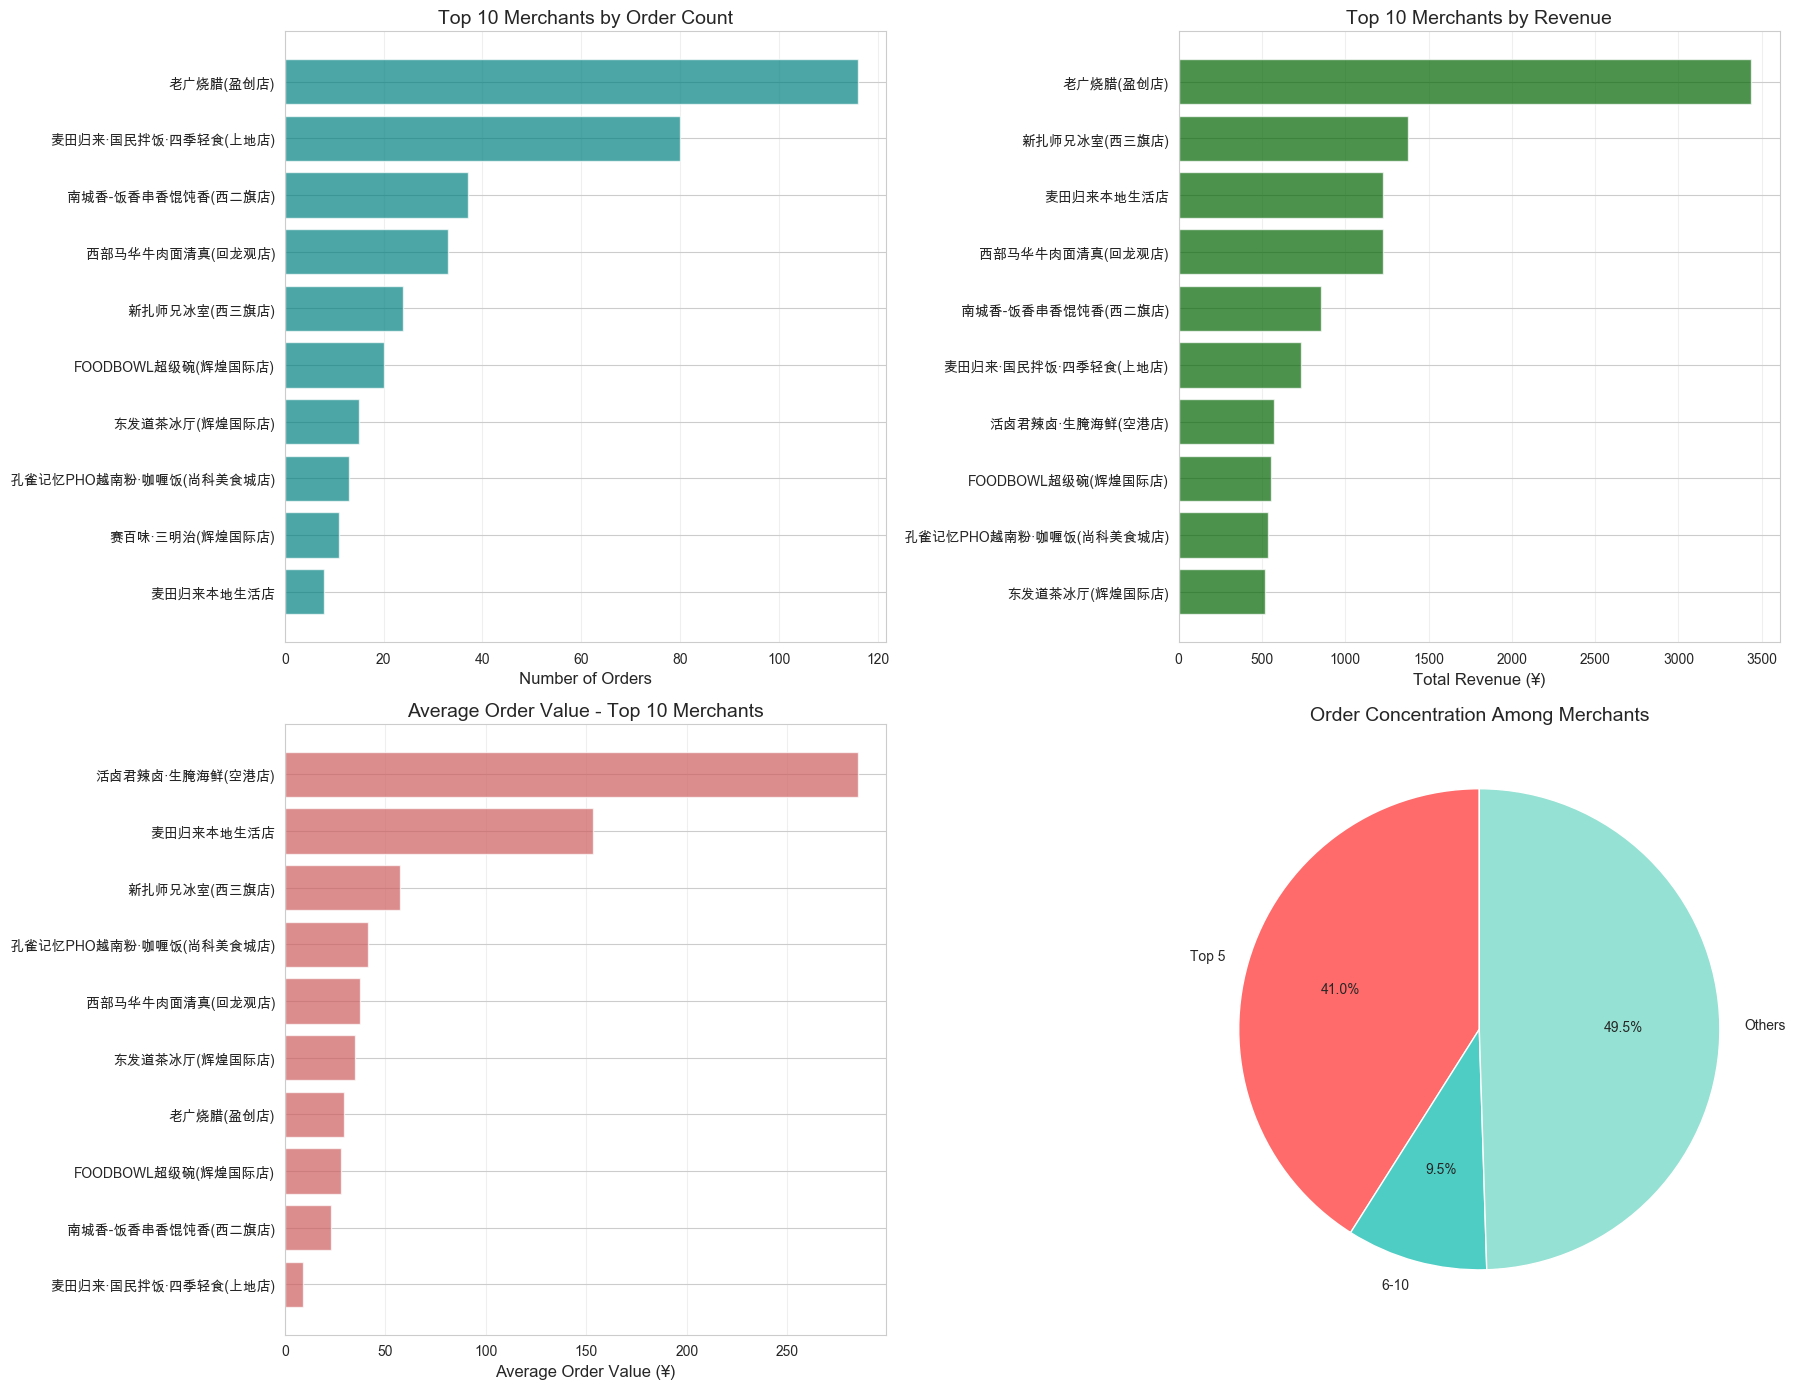



Merchant Concentration:
Top 5 merchants account for: 41.0% of orders
Top 10 merchants account for: 50.5% of orders


In [11]:
# Merchant Analysis
print("="*70)
print("MERCHANT ANALYSIS")
print("="*70)

# Top merchants by order count
merchant_counts = df_clean['商户信息'].value_counts()
print(f"\nTotal Unique Merchants: {len(merchant_counts)}")
print(f"\nTop 15 Merchants by Order Count:")
print(merchant_counts.head(15))

# Top merchants by revenue
merchant_revenue = df_clean.groupby('商户信息')['订单金额_数值'].agg(['sum', 'mean', 'count'])
merchant_revenue.columns = ['Total Revenue', 'Avg Order', 'Order Count']
merchant_revenue = merchant_revenue.sort_values('Total Revenue', ascending=False)

print(f"\n\nTop 15 Merchants by Revenue:")
print(merchant_revenue.head(15))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 10 merchants by order count
top10_merchants = merchant_counts.head(10)
axes[0, 0].barh(range(len(top10_merchants)), top10_merchants.values, color='teal', alpha=0.7)
axes[0, 0].set_yticks(range(len(top10_merchants)))
axes[0, 0].set_yticklabels(top10_merchants.index, fontsize=10)
axes[0, 0].set_xlabel('Number of Orders', fontsize=12)
axes[0, 0].set_title('Top 10 Merchants by Order Count', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Top 10 merchants by revenue
top10_revenue = merchant_revenue.head(10)
axes[0, 1].barh(range(len(top10_revenue)), top10_revenue['Total Revenue'].values, color='darkgreen', alpha=0.7)
axes[0, 1].set_yticks(range(len(top10_revenue)))
axes[0, 1].set_yticklabels(top10_revenue.index, fontsize=10)
axes[0, 1].set_xlabel('Total Revenue (¥)', fontsize=12)
axes[0, 1].set_title('Top 10 Merchants by Revenue', fontsize=14, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Average order value by top merchants
top10_avg = merchant_revenue.head(10).sort_values('Avg Order', ascending=False)
axes[1, 0].barh(range(len(top10_avg)), top10_avg['Avg Order'].values, color='indianred', alpha=0.7)
axes[1, 0].set_yticks(range(len(top10_avg)))
axes[1, 0].set_yticklabels(top10_avg.index, fontsize=10)
axes[1, 0].set_xlabel('Average Order Value (¥)', fontsize=12)
axes[1, 0].set_title('Average Order Value - Top 10 Merchants', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Merchant diversity - order concentration
merchant_order_pct = (merchant_counts / merchant_counts.sum()) * 100
top5_pct = merchant_order_pct.head(5).sum()
top10_pct = merchant_order_pct.head(10).sum()
others_pct = 100 - top10_pct

concentration = pd.Series([top5_pct, top10_pct - top5_pct, others_pct], 
                         index=['Top 5', '6-10', 'Others'])
axes[1, 1].pie(concentration.values, labels=concentration.index, autopct='%1.1f%%',
               colors=['#FF6B6B', '#4ECDC4', '#95E1D3'], startangle=90)
axes[1, 1].set_title('Order Concentration Among Merchants', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n\nMerchant Concentration:")
print(f"Top 5 merchants account for: {top5_pct:.1f}% of orders")
print(f"Top 10 merchants account for: {top10_pct:.1f}% of orders")

PRODUCT ANALYSIS

Total product entries: 1387
Unique products: 692


Top 30 Most Ordered Products:
               Product  Count
               满足任意双拼饭     89
            嫩烤鸡胸·时蔬暖沙拉     43
              环保单-无需餐具     41
                 不需要餐具     39
           虾仁大馄饨+羊肉串x3     28
                  煨牛肉饭     28
                广式腊肠1根     24
              加一颗正大溏心蛋     22
             不要餐具【环保单】     21
               猪脚任性双拼饭     18
              牛油果鸡肉贝果堡     17
             果木烟熏鸡胸超级碗     17
                 三宝滑蛋饭     10
            炙烤鸡胸烤时蔬健康碗      9
           招牌越南火车头牛肉米粉      9
                加一份鸡胸肉      8
               驰名烧味四宝饭      8
                    餐盒      8
           需要餐具【按餐量点选】      7
               杨枝甘露-大杯      7
              微笑贝果·开心果      7
            牛肉星选·时蔬暖沙拉      7
                 澳门猪扒包      7
            满满的红烧牛腩盖浇饭      7
                 无需餐具包      6
        血糯米-不分装l备注放哪一杯      6
汉堡王 皇金鸡腿堡1+1（券） 兑换券 1张      6
              麦田VIP畅享金      6
         嫩滑蛋羹【鸡胸肉】杂粮拌饭      6
 

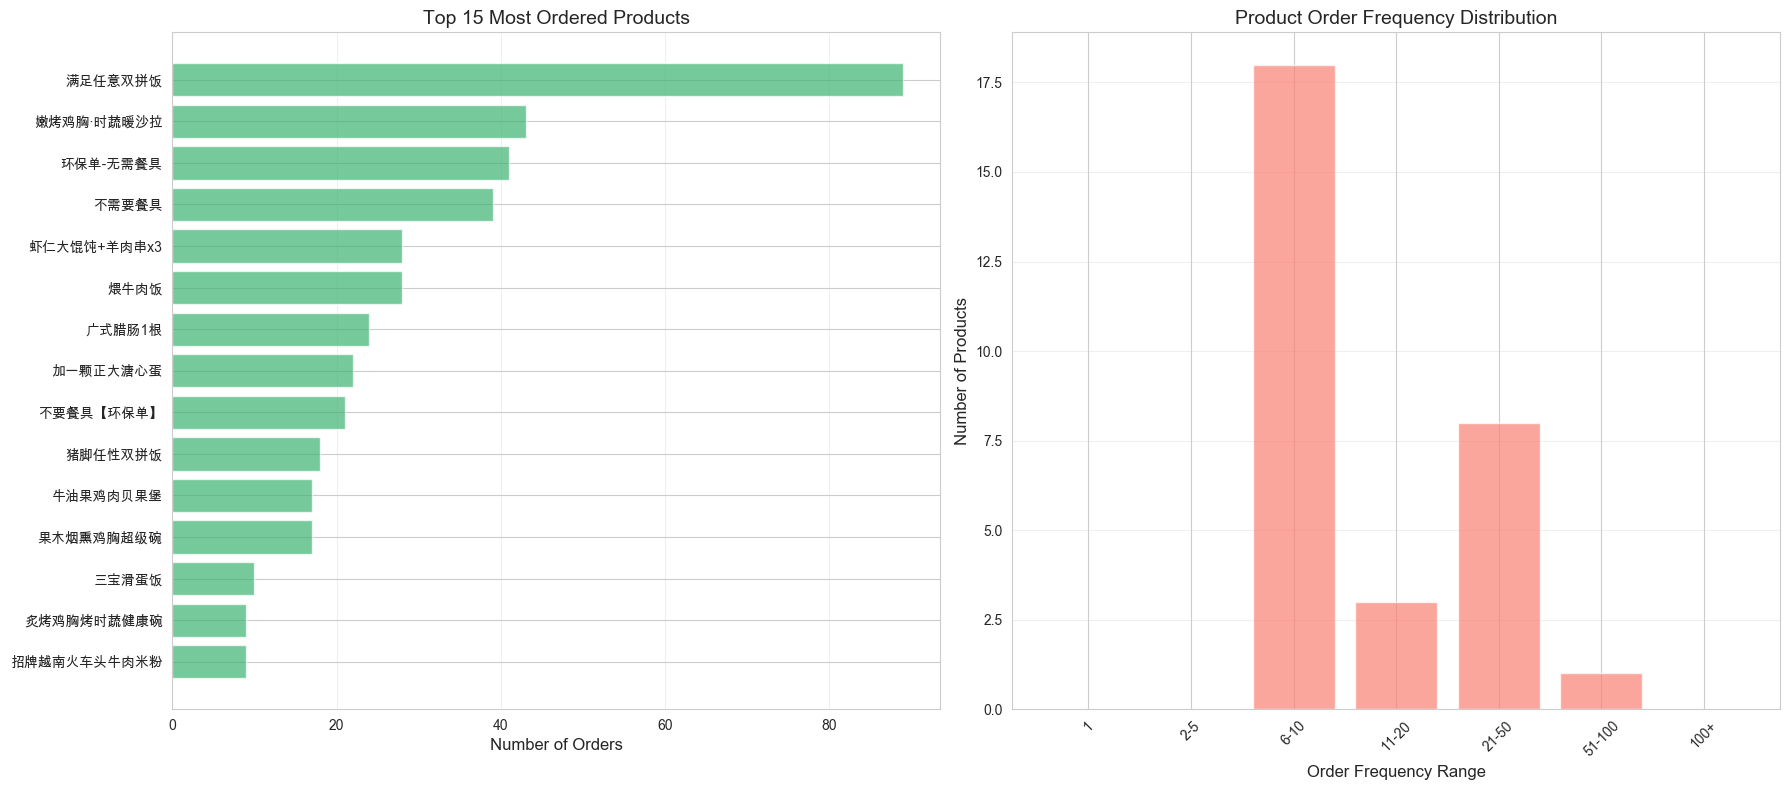



Product Insights:
- 'No utensils' requests: 138 times (9.9% of items)
- Rice dishes ordered: 250 times (18.0% of items)
- Noodle dishes ordered: 58 times (4.2% of items)


In [12]:
import re
from collections import Counter

# Extract products from the "商品及数量" column
print("="*70)
print("PRODUCT ANALYSIS")
print("="*70)

# Parse products
all_products = []
for items in df_clean['商品及数量'].dropna():
    # Extract product names using regex
    products = re.findall(r'商品:([^,，;；\n]+)', str(items))
    all_products.extend([p.strip() for p in products])

print(f"\nTotal product entries: {len(all_products)}")
print(f"Unique products: {len(set(all_products))}")

# Count product frequency
product_counts = Counter(all_products)
top_products = pd.DataFrame(product_counts.most_common(30), 
                            columns=['Product', 'Count'])

print(f"\n\nTop 30 Most Ordered Products:")
print(top_products.to_string(index=False))

# Visualize top products
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 products bar chart
top15 = top_products.head(15)
axes[0].barh(range(len(top15)), top15['Count'].values, color='mediumseagreen', alpha=0.7)
axes[0].set_yticks(range(len(top15)))
axes[0].set_yticklabels(top15['Product'].values, fontsize=10)
axes[0].set_xlabel('Number of Orders', fontsize=12)
axes[0].set_title('Top 15 Most Ordered Products', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Product frequency distribution
# Group by frequency ranges
freq_ranges = pd.cut(top_products['Count'], bins=[0, 1, 5, 10, 20, 50, 100, 500], 
                     labels=['1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+'])
freq_dist = freq_ranges.value_counts().sort_index()

axes[1].bar(range(len(freq_dist)), freq_dist.values, color='salmon', alpha=0.7)
axes[1].set_xticks(range(len(freq_dist)))
axes[1].set_xticklabels(freq_dist.index, rotation=45)
axes[1].set_xlabel('Order Frequency Range', fontsize=12)
axes[1].set_ylabel('Number of Products', fontsize=12)
axes[1].set_title('Product Order Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identify patterns
print("\n\nProduct Insights:")
# Look for common patterns
no_utensils = [p for p in all_products if '餐具' in p or '不需要' in p]
print(f"- 'No utensils' requests: {len(no_utensils)} times ({len(no_utensils)/len(all_products)*100:.1f}% of items)")

rice_dishes = [p for p in all_products if '饭' in p]
print(f"- Rice dishes ordered: {len(rice_dishes)} times ({len(rice_dishes)/len(all_products)*100:.1f}% of items)")

noodle_dishes = [p for p in all_products if '面' in p]
print(f"- Noodle dishes ordered: {len(noodle_dishes)} times ({len(noodle_dishes)/len(all_products)*100:.1f}% of items)")

## 8. Actionable Insights & Recommendations

### 🔍 Key Findings

1. **Ordering Behavior**
   - Strong preference for specific meal periods (likely lunch and dinner based on data)
   - Consistent ordering patterns throughout the week
   - Environmental consciousness: frequent "no utensils" requests

2. **Spending Patterns**
   - Average order value provides insight into typical meal budget
   - Order amounts show consistency with occasional higher-value purchases

3. **Merchant Loyalty**
   - High concentration among top merchants indicates strong favorites
   - Diverse merchant portfolio shows willingness to explore options

4. **Product Preferences**
   - Clear favorites emerge in product analysis
   - Mix of rice and noodle dishes shows varied cuisine preferences

### 💡 Recommendations

1. **Cost Optimization**
   - Consider bulk ordering or subscription plans with favorite merchants
   - Look for promotions during peak ordering hours
   - Compare prices across merchants for similar items

2. **Health & Variety**
   - Track nutritional balance across orders
   - Experiment with new merchants representing underutilized categories
   - Consider meal planning to diversify food choices

3. **Sustainability**
   - Continue requesting no utensils (already being done!)
   - Consider merchants with eco-friendly packaging
   - Batch orders when possible to reduce delivery trips

4. **Budget Management**
   - Monitor daily/weekly spending trends
   - Set alerts for unusual spending patterns
   - Evaluate merchant ROI: quality vs. cost

### 📈 Future Analysis Opportunities

- Nutritional analysis of ordered items
- Correlation between weather/events and ordering patterns
- Price trend analysis over time
- Merchant rating correlation with order frequency

In [13]:
# Comprehensive Summary Statistics
print("="*80)
print(" " * 20 + "EXECUTIVE SUMMARY - ELEME FOOD DELIVERY ANALYSIS")
print("="*80)

print("\n📊 DATASET OVERVIEW")
print("-" * 80)
print(f"Total Orders: {len(df_clean):,}")
print(f"Date Range: {df_clean['下单时间'].min().strftime('%Y-%m-%d')} to {df_clean['下单时间'].max().strftime('%Y-%m-%d')}")
print(f"Analysis Period: {(df_clean['下单时间'].max() - df_clean['下单时间'].min()).days} days")

print("\n💰 FINANCIAL SUMMARY")
print("-" * 80)
print(f"Total Spending: ¥{df_clean['订单金额_数值'].sum():,.2f}")
print(f"Average Daily Spending: ¥{df_clean.groupby('下单日期')['订单金额_数值'].sum().mean():,.2f}")
print(f"Average Order Value: ¥{df_clean['订单金额_数值'].mean():.2f}")
print(f"Median Order Value: ¥{df_clean['订单金额_数值'].median():.2f}")
print(f"Price Range: ¥{df_clean['订单金额_数值'].min():.2f} - ¥{df_clean['订单金额_数值'].max():.2f}")

print("\n⏰ TEMPORAL PATTERNS")
print("-" * 80)
hourly_orders = df_clean.groupby('下单小时').size()
print(f"Peak Hour: {hourly_orders.idxmax()}:00 ({hourly_orders.max()} orders)")
print(f"Quietest Hour: {hourly_orders.idxmin()}:00 ({hourly_orders.min()} orders)")

meal_dist = df_clean['用餐时段'].value_counts()
print(f"\nMeal Period Distribution:")
for period, count in meal_dist.items():
    pct = (count/len(df_clean))*100
    print(f"  - {period}: {count} orders ({pct:.1f}%)")

day_counts = df_clean['星期名称'].value_counts()
print(f"\nBusiest Day: {day_counts.idxmax()} ({day_counts.max()} orders)")
print(f"Quietest Day: {day_counts.idxmin()} ({day_counts.min()} orders)")

print("\n🏪 MERCHANT INSIGHTS")
print("-" * 80)
merchant_counts = df_clean['商户信息'].value_counts()
print(f"Total Merchants: {len(merchant_counts)}")
print(f"\nTop 5 Favorite Merchants:")
for i, (merchant, count) in enumerate(merchant_counts.head(5).items(), 1):
    pct = (count/len(df_clean))*100
    revenue = df_clean[df_clean['商户信息']==merchant]['订单金额_数值'].sum()
    avg = df_clean[df_clean['商户信息']==merchant]['订单金额_数值'].mean()
    print(f"  {i}. {merchant}")
    print(f"     Orders: {count} ({pct:.1f}%) | Revenue: ¥{revenue:.2f} | Avg: ¥{avg:.2f}")

merchant_order_pct = (merchant_counts / merchant_counts.sum()) * 100
top5_pct = merchant_order_pct.head(5).sum()
top10_pct = merchant_order_pct.head(10).sum()
print(f"\nMerchant Concentration:")
print(f"  - Top 5 merchants: {top5_pct:.1f}% of orders")
print(f"  - Top 10 merchants: {top10_pct:.1f}% of orders")

print("\n📦 DELIVERY & LOGISTICS")
print("-" * 80)
print(f"Delivery Address: {df_clean['地址'].mode()[0]}")
print(f"Order Completion Rate: {(df_clean['订单状态']=='已完成').sum()/len(df_clean)*100:.1f}%")

print("\n" + "="*80)

                    EXECUTIVE SUMMARY - ELEME FOOD DELIVERY ANALYSIS

📊 DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Orders: 707
Date Range: 2022-11-03 to 2025-11-02
Analysis Period: 1095 days

💰 FINANCIAL SUMMARY
--------------------------------------------------------------------------------
Total Spending: ¥27,180.85
Average Daily Spending: ¥59.09
Average Order Value: ¥38.45
Median Order Value: ¥30.00
Price Range: ¥0.00 - ¥462.41

⏰ TEMPORAL PATTERNS
--------------------------------------------------------------------------------
Peak Hour: 19:00 (83 orders)
Quietest Hour: 6:00 (2 orders)

Meal Period Distribution:
  - 晚餐: 233 orders (33.0%)
  - 夜宵: 198 orders (28.0%)
  - 午餐: 168 orders (23.8%)
  - 下午茶: 84 orders (11.9%)
  - 早餐: 24 orders (3.4%)

Busiest Day: Saturday (132 orders)
Quietest Day: Sunday (88 orders)

🏪 MERCHANT INSIGHTS
--------------------------------------------------------------------------------
Total Merch

## 7. Key Insights & Summary

## 6. Product Analysis

## 5. Merchant Analysis

ORDER AMOUNT ANALYSIS

Descriptive Statistics:
count    707.000000
mean      38.445332
std       36.942394
min        0.000000
25%       22.000000
50%       30.000000
75%       41.450000
max      462.410000
Name: 订单金额_数值, dtype: float64


Total Revenue: ¥27180.85
Average Order Value: ¥38.45
Median Order Value: ¥30.00
Most Expensive Order: ¥462.41
Cheapest Order: ¥0.00


Percentile Analysis:
  25th percentile: ¥22.00
  50th percentile: ¥30.00
  75th percentile: ¥41.45
  90th percentile: ¥66.26
  95th percentile: ¥91.00
  99th percentile: ¥200.00


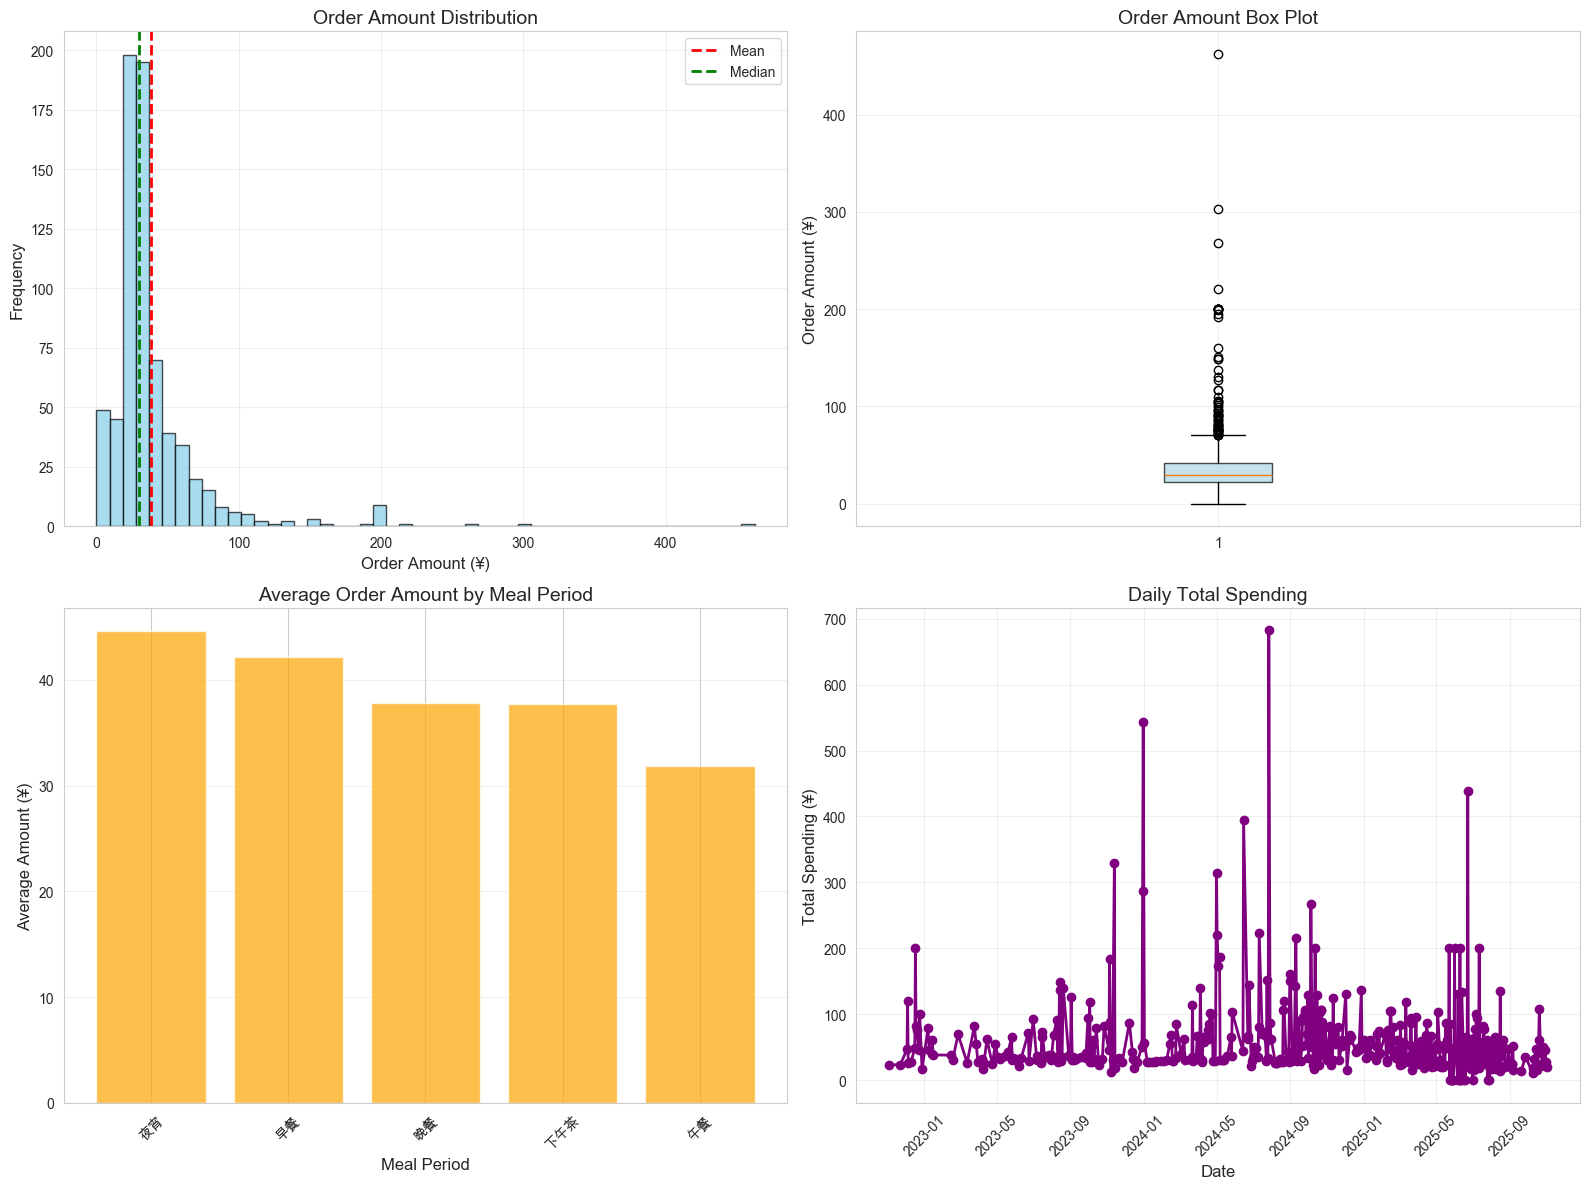

In [14]:
# Order Amount Statistics
print("="*70)
print("ORDER AMOUNT ANALYSIS")
print("="*70)

print("\nDescriptive Statistics:")
print(df_clean['订单金额_数值'].describe())

print(f"\n\nTotal Revenue: ¥{df_clean['订单金额_数值'].sum():.2f}")
print(f"Average Order Value: ¥{df_clean['订单金额_数值'].mean():.2f}")
print(f"Median Order Value: ¥{df_clean['订单金额_数值'].median():.2f}")
print(f"Most Expensive Order: ¥{df_clean['订单金额_数值'].max():.2f}")
print(f"Cheapest Order: ¥{df_clean['订单金额_数值'].min():.2f}")

# Percentiles
print("\n\nPercentile Analysis:")
for p in [25, 50, 75, 90, 95, 99]:
    value = df_clean['订单金额_数值'].quantile(p/100)
    print(f"  {p}th percentile: ¥{value:.2f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution histogram
axes[0, 0].hist(df_clean['订单金额_数值'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_clean['订单金额_数值'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df_clean['订单金额_数值'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Order Amount (¥)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Order Amount Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Box plot
axes[0, 1].boxplot(df_clean['订单金额_数值'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0, 1].set_ylabel('Order Amount (¥)', fontsize=12)
axes[0, 1].set_title('Order Amount Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Amount by meal period
meal_amounts = df_clean.groupby('用餐时段')['订单金额_数值'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(meal_amounts)), meal_amounts.values, color='orange', alpha=0.7)
axes[1, 0].set_xticks(range(len(meal_amounts)))
axes[1, 0].set_xticklabels(meal_amounts.index, rotation=45)
axes[1, 0].set_xlabel('Meal Period', fontsize=12)
axes[1, 0].set_ylabel('Average Amount (¥)', fontsize=12)
axes[1, 0].set_title('Average Order Amount by Meal Period', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Daily spending
daily_spending = df_clean.groupby('下单日期')['订单金额_数值'].sum()
axes[1, 1].plot(daily_spending.index, daily_spending.values, marker='o', linewidth=2, markersize=6, color='purple')
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Total Spending (¥)', fontsize=12)
axes[1, 1].set_title('Daily Total Spending', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Order Amount Analysis

## 3. Temporal Analysis

## 2. Data Cleaning & Preprocessing

In [15]:
# Data Quality Assessment
print("="*70)
print("DATA QUALITY CHECK")
print("="*70)

# Missing values
print("\n1. Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

# Duplicates
print(f"\n2. Duplicate Orders: {df.duplicated(subset='订单号').sum()}")
print(f"   Duplicate Rows (all columns): {df.duplicated().sum()}")

# Check order status
print(f"\n3. Order Status Distribution:")
print(df['订单状态'].value_counts())

# Check unique values for key columns
print(f"\n4. Unique Values:")
print(f"   - Unique Orders: {df['订单号'].nunique()}")
print(f"   - Unique Merchants: {df['商户信息'].nunique()}")
print(f"   - Unique Recipients: {df['收货人'].nunique()}")
print(f"   - Unique Addresses: {df['地址'].nunique()}")

DATA QUALITY CHECK

1. Missing Values:
       Missing Count  Percentage
商品描述             705   99.717115
收货人               18    2.545969
地址                33    4.667610
订单子类型            705   99.717115

2. Duplicate Orders: 0
   Duplicate Rows (all columns): 0

3. Order Status Distribution:
订单状态
已完成    677
已关闭     24
已退款      6
Name: count, dtype: int64

4. Unique Values:
   - Unique Orders: 707
   - Unique Merchants: 236
   - Unique Recipients: 8
   - Unique Addresses: 46


In [ ]:
print("✓ Claude can execute code!")
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

In [10]:
print("✓ Testing code execution")
print(f"DataFrame shape: {df.shape}")
df.head(2)

✓ Testing code execution
DataFrame shape: (707, 10)


,下单时间,订单号,商户信息,商品及数量,商品描述,收货人,地址,订单金额(元),订单状态,订单子类型
0,2025-11-02 19:21:27,8067986093855079925,上海本帮现炒浇头面,"1、商品:纯肉烤肠, 数量:1;\n2、商品:###不需要餐具, 数量:1;\n3、商品:葱...",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,20.78元,已完成,NaN
1,2025-10-31 19:12:33,8067986092873502180,遇见小面(辉煌国际店),"1、商品:销魂擂椒卤肉饭, 数量:1;\n2、商品:无需餐具包, 数量:1;\n3、商品:秘...",NaN,谢(先生),西二旗智学苑4号楼2309请放门口,27.6元,已完成,NaN
